## 5.1 简介
推荐引擎是一个能预测用户兴趣点的模型。将推荐引擎应用于电影语境时，便成了一个电影 推荐引擎。我们通过预测当前用户可能会喜欢的内容，将相应的东西从数据库中筛选出来，这样 的推荐引擎可以有助于将用户和数据集中的合适内容连接起来。为什么推荐引擎这么重要?设想 你有一个很庞大的商品目录，而用户可能或者不可能查找所有的相关内容。通过推荐合适的内容， 可以增加用户消费。有些公司(如Netflix)严重地依赖推荐系统来保持用户参与度。  
推荐引擎通常用协同过滤(collaborative filtering)或基于内容的过滤(content-based filtering) 来产生一组推荐。两种过滤方法的不同之处在于挖掘推荐的方式。协同过滤从当前用户过去的行 为和其他用户对当前用户的评分来构建模型，然后使用这个模型来预测这个用户可能感兴趣的内 容;而基于内容的过滤用商品本身的特征来给用户推荐更多的商品，商品间的相似度是模型主要 的关注点。本章将重点介绍协同过滤。

## 5.2 为数据处理构建函数组合
机器学习系统中的主要组成部分是数据处理流水线。在数据被输入到机器学习算法中进行训 练之前，需要对数据做各种方式的处理，使得该数据可以被算法利用。在构建一个准确的、可扩 展的机器学习系统的过程中，拥有一个健壮的数据处理流水线非常重要。有很多基本的函数功能 可以使用，通常数据处理流水线就是这些基本函数的组合。不推荐使用嵌套或循环的方式调用这 些函数，而是用函数式编程的方式构建函数组合。接下来介绍如何组合这些函数来形成一个可重 用的函数组合，本节将创建3个基本函数，并介绍如何将其组合成一个流水线

In [1]:
#pipeline via function
from functools import reduce
import numpy as np
def add3(input_array):
    return map(lambda x : x+3,input_array)
def mul2(input_array):
    return map(lambda x : x*2,input_array)
def sub5(input_array):
    return map(lambda x : x-5,input_array)
def function_composer(*args):
    return reduce(lambda f,g:lambda x :f(g(x)),args)
function_composer=function_composer(sub5,mul2,add3)
print('Operation add3(mul2(sub5(arr)))',list(function_composer(np.array([2,3,5,7]))))

Operation add3(mul2(sub5(arr))) [5, 7, 11, 15]


## 5.3 为机器学习构建流水线
scikit-learn库中包含了构建机器学习流水线的方法。只需要指定函数，它就会构建一个组合 对象，使数据通过整个流水线。这个流水线可以包括诸如预处理、特征选择、监督式学习、非监 督式学习等函数。这一节将构建一个流水线，以便输入特征向量、选择最好的k个特征、用随机 森林分类器进行分类等

### 5.3.1 详细步骤

In [2]:
from sklearn.datasets import samples_generator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline

/usr/local/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#构建一个20维的特征向量
X,y=samples_generator.make_classification(n_informative=4,
                                          n_features=20,
                                          n_redundant=0,
                                          random_state=5)
#特征选择
selector_KBest=SelectKBest(f_regression,k=10)
#构建分类器
classify=RandomForestClassifier(n_estimators=50,max_depth=4)
#构建流水线
pipeline_classify=Pipeline([('selector',selector_KBest),('rf',classify)])
pipeline_classify.fit(X,y)
prediction=pipeline_classify.predict(X)
print('prediction is ',prediction)
print('score is ',pipeline_classify.score(X,y))
#查看被选中的特征
features_status=pipeline_classify.named_steps['selector'].get_support()
selected_features=[]
for count,item in enumerate(features_status):
    if item:
        selected_features.append(count)
print('Select feature (0-indexed):',','.join([str(x) for x in selected_features]))

prediction is  [1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1]
score is  0.97
Select feature (0-indexed): 0,5,7,9,10,11,13,15,16,18


### 5.3.2 工作原理
选择k个最好的特征，其好处在于可以处理较小维度的数据，这对减小计算复杂度来说非常 有用。选择k个最佳特征的方式是基于单变量的特征选择，选择过程是先进行单变量统计测试， 然后从特征向量中抽取最优秀的特征。单变量统计测试是指只涉及一个变量的分析技术。  
做了这些测试后，向量空间中的每个特征将有一个评价分数。基于这些评价分数，选择最好 的k个特征。我们在分类器流水线中执行这个预处理步骤。一旦抽取出k个特征，一个k维的特征 向量就形成了，可以将这个特征向量用于随机森林分类器的输入训练数据。

## 5.4 寻找最近邻
KNN

In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
X = np.array([[1, 1], [1, 3], [2, 2], [2.5, 5], [3, 1],
            [4, 2], [2, 3.5], [3, 3], [3.5, 4]])
num_neighbors=3
input_point=[2.6,1.7]
knn=NearestNeighbors(n_neighbors=num_neighbors,algorithm='ball_tree').fit(X)
distance,indices=knn.kneighbors(np.array(input_point).reshape(1,-1))

/usr/local/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


1 --> [2. 2.] --> 0.670820393249937
2 --> [3. 1.] --> 0.8062257748298549
3 --> [3. 3.] --> 1.3601470508735443


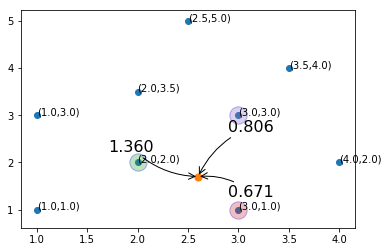

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(input_point[0],input_point[1],s=50)
for i in X:
    plt.annotate(s='({},{})'.format(i[0],i[1]),xy=(i[0],i[1]))
direction=[[30,-20],[30,45],[-90,25]]
for rank,index in enumerate(indices[0][:num_neighbors]):
    print(str(rank+1),'-->',X[index],'-->',distance[0][rank])
    plt.scatter(X[index][0],X[index][1],s=300,alpha=0.3,edgecolors='b')
    plt.annotate(s='{:.3f}'.format(distance[0][rank]),
                 xy=(input_point[0],input_point[1]),
                 xycoords='data', xytext=(direction[rank][0],direction[rank][1]),
                 textcoords='offset points', fontsize=16,
                 arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))

## 5.5 构建一个KNN分类器

In [6]:
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('data_nn_classifier.txt', header=None)

In [7]:
X,y=df.iloc[:,:-1],df.iloc[:,-1].astype(np.int)
X=np.array(X)
y=np.array(y)

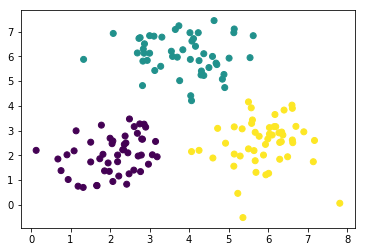

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

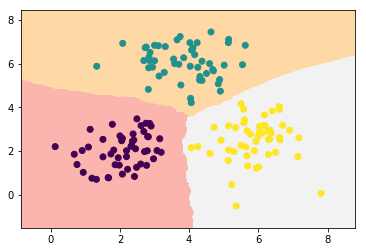

In [9]:

num_nerighbors=10
classifier=KNeighborsClassifier(n_neighbors=num_nerighbors,weights='distance').fit(X,y)
#定义网格
h=0.01
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
x_grid,y_grid=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
#计算网格中所有的输出
predicted_values=classifier.predict(np.c_[x_grid.ravel(),y_grid.ravel()]).reshape(x_grid.shape)
#画图
plt.pcolormesh(x_grid,y_grid,predicted_values,cmap=plt.cm.Pastel1)
plt.scatter(X[:,0],X[:,1],c=y)

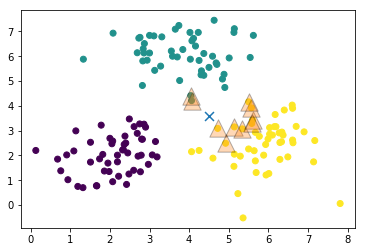

In [10]:
test_point=np.array([4.5,3.6]).reshape(1,-1)
dist,indices=classifier.kneighbors(test_point)
plt.scatter(test_point[0,0],test_point[0,1],s=80,edgecolors='k',marker='x')
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(X[indices[0],0],X[indices[0],1],s=300,alpha=0.3,edgecolors='k',marker='^')

In [11]:
print('predict output is ',classifier.predict(test_point)[0])

predict output is  2


## 5.6 构建一个KNN 回归器

Text(0.5,1,'Input data')

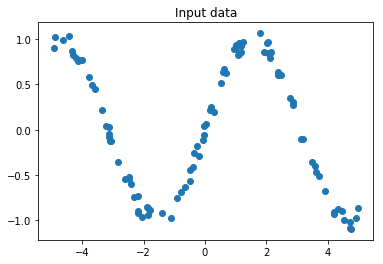

In [13]:
amplitude=10
num_points=100
X=amplitude*(np.random.rand(num_points,1)-0.5)
y=np.sin(X).ravel()
y+=0.2*(0.5-np.random.rand(y.size))

plt.scatter(X,y)
plt.title('Input data')

In [21]:
x_values=np.linspace(-0.5*amplitude,0.5*amplitude,10*num_points)[:,np.newaxis]

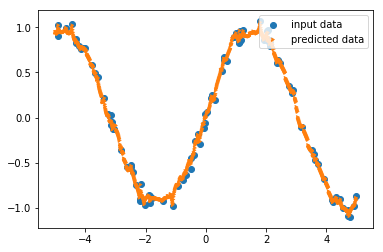

In [36]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors=8
knn_regressor=KNeighborsRegressor(n_neighbors,weights='distance')
y_values=knn_regressor.fit(X,y).predict(x_values)
plt.scatter(X,y,label='input data')
plt.scatter(x_values,y_values,s=10,linestyle='--',marker='>',label='predicted data')
plt.legend(loc=1)

## 5.7 计算相似度

In [37]:
import json

In [39]:
with open('movie_ratings.json','r') as fr:
    data=json.loads(fr.read())

In [41]:
data['Melissa Jones']

{'Inception': 3.0,
 'Pulp Fiction': 4.0,
 'Anger Management': 2.0,
 'Fracture': 3.0,
 'Jerry Maguire': 3.0,
 'Serendipity': 2.0}

In [42]:
#欧氏距离计算相似度
def euclidean_score(dataset,user1,user2):
    if user1 not in dataset:
        raise TypeError('User'+user1+' not in the dataset')
    if user2 not in dataset:
        raise TypeError('User'+user2+' not in the dataset')
    rated_by_both={}
    for item in dataset[user1]:
        if item in dataset[user2]:
            rated_by_both[item]=1
    if len(rated_by_both)==0:
        return 0
    squared_diff=[]
    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_diff.append(np.square(dataset[user1][item]-dataset[user2][item]))
    return 1/(1+np.sqrt(np.sum(squared_diff)))
euclidean_score(data,'John Carson','Michelle Peterson')

0.29429805508554946

In [49]:
#欧氏距离计算相似度
def pearson_score(dataset,user1,user2):
    if user1 not in dataset:
        raise TypeError('User'+user1+' not in the dataset')
    if user2 not in dataset:
        raise TypeError('User'+user2+' not in the dataset')
    rated_by_both={}
    for item in dataset[user1]:
        if item in dataset[user2]:
            rated_by_both[item]=1
    num_ratings = len(rated_by_both)
    if len(rated_by_both)==0:
        return 0
    x=np.array([dataset[user1][item] for item in rated_by_both])
    y=np.array([dataset[user2][item] for item in rated_by_both])
    Sxy=np.mean(np.sum((x-x.mean())*(y-y.mean())))
    Sxx=np.sqrt(
        np.mean(np.sum(np.square(x-x.mean())))*np.mean(np.sum(np.square(y-y.mean())))
    )
    return Sxy/Sxx
    
    
#     print([dataset[user1][item] for item in rated_by_both])
#     print([dataset[user2][item] for item in rated_by_both])
#     user1_sum = np.sum([dataset[user1][item] for item in rated_by_both]) 
#     user2_sum = np.sum([dataset[user2][item] for item in rated_by_both])
#     print(user1_sum,user2_sum)

# # 计算所有相同评分电影的评分的平方和
#     user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in rated_by_both])
#     user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in rated_by_both])
#     product_sum = np.sum([dataset[user1][item] * dataset[user2][item] for item in rated_by_both])
#     Syy = user2_squared_sum - np.square(user2_sum) / num_ratings
# # 计算皮尔逊相关度
#     Sxy = product_sum - (user1_sum * user2_sum / num_ratings) 
#     Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
#     return Sxy / np.sqrt(Sxx * Syy+1e-6)

pearson_score(data,'John Carson','Michelle Peterson')

0.39605901719066977

## 5.9 寻找数据集中的相似用户

In [55]:
def find_similiar_users(dataset,user,num_users):
    if user not in dataset:
        raise TypeError('User '+user+' is not in the dataset')
    scores=np.array([[x,pearson_score(dataset,user,x)] for x in dataset if user != x])
    scores_sorted=np.argsort(scores[:,1])
    scores_dec=scores_sorted[::-1]
    return scores[scores_dec[:num_users]]
user='John Carson'
similiar_users=find_similiar_users(data,user,3)
for item in similiar_users:
    print(item[0],'\t',round(float(item[1]),2))

Michael Henry 	 0.99
Alex Roberts 	 0.75
Melissa Jones 	 0.59


## 5.10 生成电影推荐


In [86]:
def generate_recommendations(dataset,user):
    if user not in dataset:
        raise TypeError('User'+user+'is not in the data')
    total_scores={}
    similiar_sum={}
    for u in [x for x in dataset if x != user]:
        score=pearson_score(dataset,user,u)
        if score<=0:
            continue
        for item in [x for x in dataset[u] if x != dataset[user] or dataset[user][x]==0]:
            total_scores.update({item:dataset[u][item]*score})
            similiar_sum.update({item:score})
            print(item,'\t',dataset[u][item],score)
    if len(total_scores) ==0:
        return 'NO recommendation'
    movie_ranks=np.array([[total/similiar_sum[item],item] for item,total in total_scores.items()])
    movie_ranks=movie_ranks[np.argsort(movie_ranks[:,0])[::-1]]
    recommendations=[movie for _,movie in movie_ranks]
    return recommendations
for k,v in data.items():
    print(k,'\t',generate_recommendations(data,k),'\n')

Inception 	 3.0 0.39605901719066977
Pulp Fiction 	 3.5 0.39605901719066977
Anger Management 	 1.5 0.39605901719066977
Fracture 	 5.0 0.39605901719066977
Jerry Maguire 	 3.0 0.39605901719066977
Serendipity 	 3.5 0.39605901719066977
Inception 	 2.5 0.40451991747794525
Pulp Fiction 	 3.0 0.40451991747794525
Fracture 	 3.5 0.40451991747794525
Jerry Maguire 	 4.0 0.40451991747794525
Pulp Fiction 	 3.5 0.5669467095138409
Anger Management 	 3.0 0.5669467095138409
Jerry Maguire 	 4.5 0.5669467095138409
Fracture 	 4.0 0.5669467095138409
Serendipity 	 2.5 0.5669467095138409
Inception 	 3.0 0.5940885257860046
Pulp Fiction 	 4.0 0.5940885257860046
Anger Management 	 2.0 0.5940885257860046
Fracture 	 3.0 0.5940885257860046
Jerry Maguire 	 3.0 0.5940885257860046
Serendipity 	 2.0 0.5940885257860046
Inception 	 3.0 0.747017880833996
Pulp Fiction 	 4.0 0.747017880833996
Jerry Maguire 	 3.0 0.747017880833996
Fracture 	 5.0 0.747017880833996
Serendipity 	 3.5 0.747017880833996
Pulp Fiction 	 4.5 0.99124

In [74]:
(set(data)-set([user]))

TypeError: 'set' object does not support indexing

In [75]:
a=set([1,2,3])

In [76]:
a.

{1, 2, 3}